# Convolutional Neural Network

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils

Using TensorFlow backend.


載入資料集

In [2]:
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print('X_train.shape=', X_train.shape)
print('y_train.shape=', y_train.shape)

X_train.shape= (60000, 28, 28)
y_train.shape= (60000,)


In [5]:
print('X_test.shape=', X_test.shape)
print('y_test.shape=', y_test.shape)

X_test.shape= (10000, 28, 28)
y_test.shape= (10000,)


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

隨便畫一張圖

In [7]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()

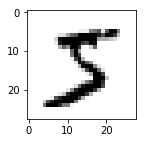

In [8]:
plot_image(X_train[0])

和標籤比對一下

In [9]:
y_train[0]

5

In [10]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5,5,i+1)
        ax.imshow(images[idx], cmap='binary')
        title = 'label=' + str(labels[idx])
        if len(prediction) > 0:
            title += ', prediction=' + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

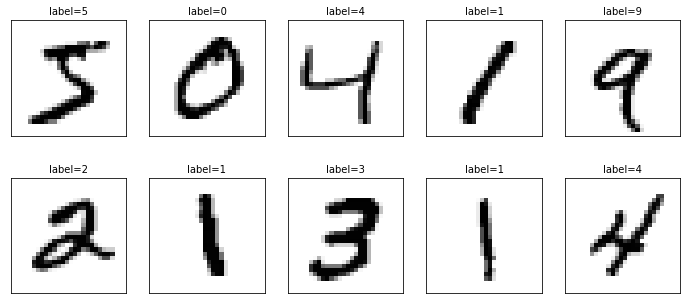

In [11]:
plot_images_labels_prediction(X_train, y_train, [], 0, 10)

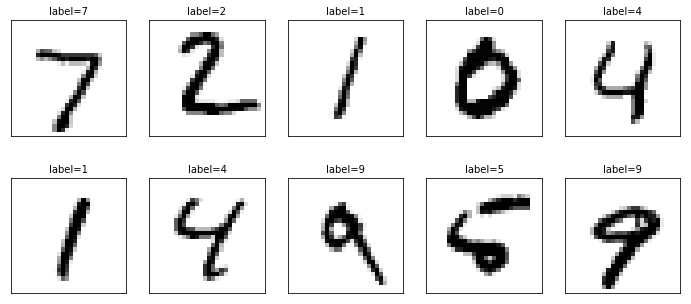

In [12]:
plot_images_labels_prediction(X_test, y_test, [], 0, 10)

轉換維度成 28*28*1(單色，灰階)

In [13]:
X_train_4d = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test_4d = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [14]:
print('X_train_4d.shape=', X_train_4d.shape)
print('X_test_4d.shape=', X_test_4d.shape)

X_train_4d.shape= (60000, 28, 28, 1)
X_test_4d.shape= (10000, 28, 28, 1)


將 0~255 的灰階縮放成 0~1

In [15]:
X_train_4d_norm = X_train_4d / 255
X_test_4d_norm = X_test_4d / 255

把類別做 onehot encoding

In [16]:
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

建立 CNN 模型

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [20]:
model = Sequential()

filter 為 16, kernel size 為 (5,5), padding 為 same

In [21]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))

MaxPooling size 為 (2,2)

In [22]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))

In [24]:
model.add(MaxPooling2D(pool_size=(2,2)))

drop 掉部分神經元避免 overfitting，一般來說用 25%~50%

In [25]:
model.add(Dropout(0.25))

平坦化

In [26]:
model.add(Flatten())

In [27]:
model.add(Dense(128, activation='relu'))

In [28]:
model.add(Dropout(0.5))

In [29]:
model.add(Dense(10, activation='softmax'))

In [30]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

開始訓練模型

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
train_history = model.fit(x=X_train_4d_norm,
                          y=y_train_onehot,
                          validation_split=0.2,
                          epochs=20,
                          batch_size=300,
                          verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 39s - loss: 0.5112 - acc: 0.8375 - val_loss: 0.1031 - val_acc: 0.9702
Epoch 2/20
 - 36s - loss: 0.1449 - acc: 0.9571 - val_loss: 0.0651 - val_acc: 0.9796
Epoch 3/20
 - 37s - loss: 0.1058 - acc: 0.9692 - val_loss: 0.0535 - val_acc: 0.9833
Epoch 4/20
 - 36s - loss: 0.0859 - acc: 0.9745 - val_loss: 0.0464 - val_acc: 0.9862
Epoch 5/20
 - 36s - loss: 0.0740 - acc: 0.9783 - val_loss: 0.0460 - val_acc: 0.9861
Epoch 6/20
 - 37s - loss: 0.0627 - acc: 0.9808 - val_loss: 0.0388 - val_acc: 0.9884
Epoch 7/20
 - 37s - loss: 0.0571 - acc: 0.9832 - val_loss: 0.0376 - val_acc: 0.9892
Epoch 8/20
 - 37s - loss: 0.0496 - acc: 0.9850 - val_loss: 0.0363 - val_acc: 0.9893
Epoch 9/20
 - 36s - loss: 0.0465 - acc: 0.9853 - val_loss: 0.0350 - val_acc: 0.9899
Epoch 10/20
 - 37s - loss: 0.0420 - acc: 0.9877 - val_loss: 0.0349 - val_acc: 0.9902
Epoch 11/20
 - 37s - loss: 0.0422 - acc: 0.9873 - val_loss: 0.0320 - val_acc: 0.9907
Epoch 12/20
 - 37s - los

In [33]:
def show_train_history(train_acc, test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

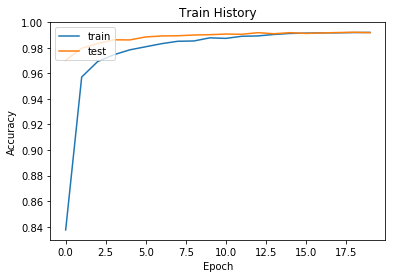

In [34]:
show_train_history('acc', 'val_acc')

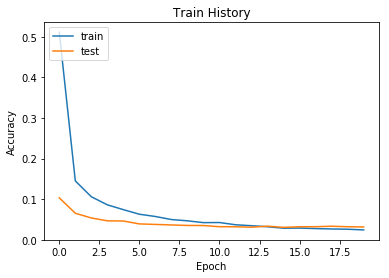

In [35]:
show_train_history('loss', 'val_loss')

評估模型準確率

In [36]:
scores = model.evaluate(X_test_4d_norm, y_test_onehot)
scores[1]

10000/10000 [==============================] - 4s 351us/step


0.994

In [37]:
prediction = model.predict_classes(X_test_4d_norm)

In [38]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

查看預測結果

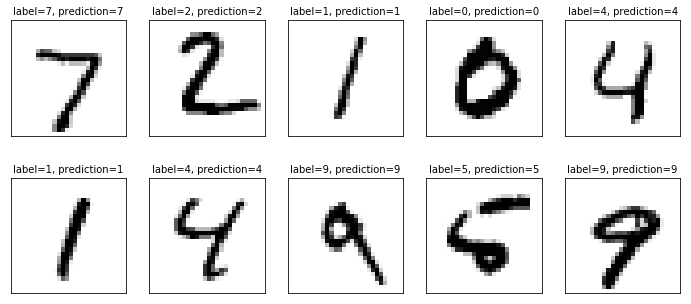

In [39]:
plot_images_labels_prediction(X_test, y_test, prediction, idx=0)

混淆矩陣

In [40]:
pd.crosstab(y_test, prediction, rownames=['labels'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
labels,,,,,,,,,,
0,976,0,0,0,0,0,2,1,1,0
1,0,1133,0,0,0,1,0,1,0,0
2,1,1,1027,0,0,0,0,3,0,0
3,0,0,0,1008,0,1,0,0,1,0
4,0,0,0,0,977,0,0,0,0,5
5,0,0,0,5,0,885,1,0,0,1
6,4,2,0,0,1,4,946,0,1,0
7,0,1,1,1,0,0,0,1024,1,0
8,2,0,1,2,0,0,0,0,966,3


In [41]:
df = pd.DataFrame({'label':y_test, 'predict':prediction})

In [42]:
df.head()

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [43]:
df[(df.label == 5) & (df.predict==3)]

,label,predict
340,5,3
1393,5,3
2035,5,3
2597,5,3
5937,5,3


In [44]:
df[(df.label == 5) & (df.predict==3)].index

Int64Index([340, 1393, 2035, 2597, 5937], dtype='int64')

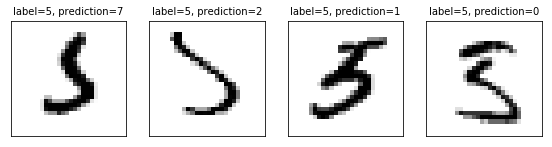

In [45]:
plot_images_labels_prediction([X_test[i] for i in df[(df.label == 5) & (df.predict==3)].index],
                              [y_test[i] for i in df[(df.label == 5) & (df.predict==3)].index],
                              prediction,
                              idx=0, num=4)